In [15]:
import zipfile
import os

zip_path = "suit_2025Aug22T054108230.zip"
extract_path = "suit_data"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("Files extracted to:", extract_path)

Files extracted to: suit_data


In [16]:
pip install cdflib

Note: you may need to restart the kernel to use updated packages.


In [17]:
import glob
files = glob.glob(path + "/**/*.cdf", recursive=True) + glob.glob(path + "/**/*.CDF", recursive=True)
print(len(files), "CDF files found")


0 CDF files found


In [18]:
import os

path = "suit_data"
for root, dirs, files in os.walk(path):
    for f in files:
        print(os.path.join(root, f))


suit_data\SUT_C25_0332_001234_Lev1.0_2025-08-20T01.22.54.522_0972NB03.fits
suit_data\SUT_T25_1125_001235_Lev1.0_2025-08-20T02.01.13.726_0972NB03.fits
suit_data\SUT_T25_1125_001235_Lev1.0_2025-08-20T02.02.45.694_0972NB03.fits
suit_data\SUT_T25_1125_001235_Lev1.0_2025-08-20T02.04.17.662_0972NB03.fits
suit_data\SUT_T25_1125_001235_Lev1.0_2025-08-20T02.05.49.631_0972NB03.fits
suit_data\SUT_T25_1125_001235_Lev1.0_2025-08-20T02.07.21.599_0972NB03.fits
suit_data\SUT_T25_1125_001235_Lev1.0_2025-08-20T02.08.53.567_0972NB03.fits
suit_data\SUT_T25_1125_001235_Lev1.0_2025-08-20T02.10.25.535_0972NB03.fits
suit_data\SUT_T25_1125_001235_Lev1.0_2025-08-20T02.11.57.504_0972NB03.fits
suit_data\SUT_T25_1125_001235_Lev1.0_2025-08-20T02.13.29.472_0972NB03.fits
suit_data\SUT_T25_1125_001235_Lev1.0_2025-08-20T02.15.01.440_0972NB03.fits
suit_data\SUT_T25_1125_001235_Lev1.0_2025-08-20T02.16.33.408_0972NB03.fits
suit_data\SUT_T25_1125_001235_Lev1.0_2025-08-20T02.18.05.377_0972NB03.fits
suit_data\SUT_T25_1125_00

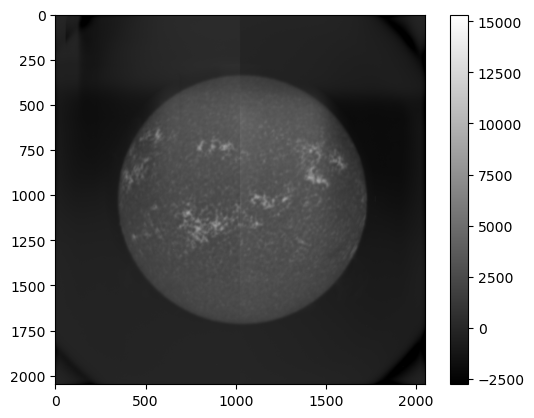

In [19]:
from astropy.io import fits
import matplotlib.pyplot as plt
import os

path = "suit_data"
files = [f for f in os.listdir(path) if f.endswith(".fits")]

hdul = fits.open(os.path.join(path, files[0]))
data = hdul[0].data
plt.imshow(data, cmap='gray')
plt.colorbar()
plt.show()
hdul.close()


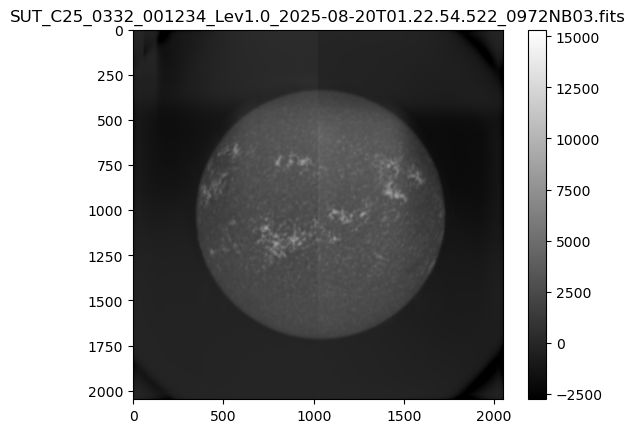

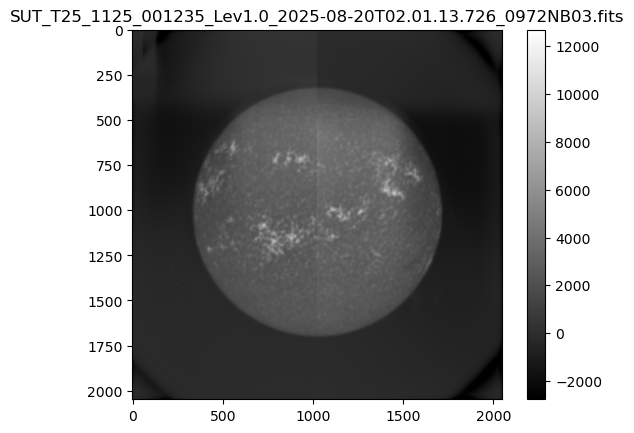

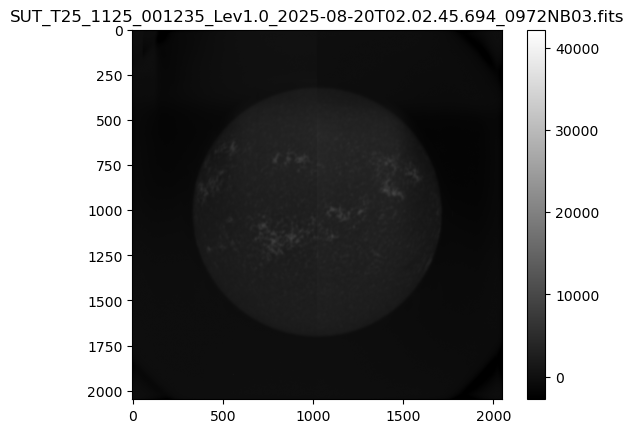

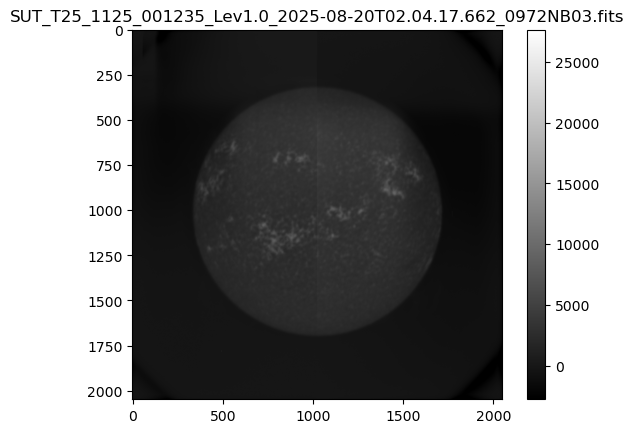

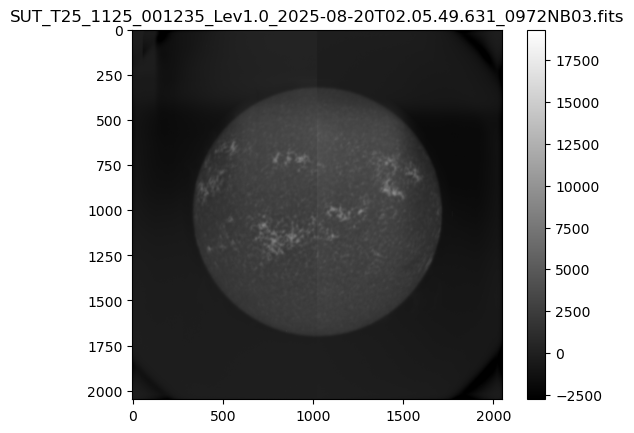

In [20]:
for f in files[:5]:
    hdul = fits.open(os.path.join(path, f))
    data = hdul[0].data
    plt.imshow(data, cmap='gray')
    plt.title(f)
    plt.colorbar()
    plt.show()
    hdul.close()


In [21]:
%pip install astropy numpy pandas scipy scikit-image scikit-learn matplotlib


In [29]:
import os
import numpy as np
import pandas as pd
from astropy.io import fits

path = "suit_data"
files = [os.path.join(path, f) for f in os.listdir(path) if f.endswith(".fits")]

rows = []
for f in files:
    try:
        with fits.open(f, memmap=False) as hdul:
            hdr = hdul[0].header
            data = hdul[0].data

            filt = hdr.get("FILTER") or hdr.get("NBAND") or ""
            exp = hdr.get("EXPTIME") or hdr.get("EXPOSURE") or np.nan
            date = hdr.get("DATE-OBS", "")

            if data is not None and hasattr(data, "shape"):
                ny, nx = data.shape[-2:]
            else:
                nx, ny = (np.nan, np.nan)

            rows.append((os.path.basename(f), date, filt, exp, nx, ny))
    except Exception as e:
        print(f"Skipping {f}: {e}")

df = pd.DataFrame(rows, columns=["File", "Date", "Filter", "Exposure", "Nx", "Ny"])
df.head()


,File,Date,Filter,Exposure,Nx,Ny
0,SUT_C25_0332_001234_Lev1.0_2025-08-20T01.22.54...,2025-08-20T01:22:54.522050000,,0.3,2048,2048
1,SUT_T25_1125_001235_Lev1.0_2025-08-20T02.01.13...,2025-08-20T02:01:13.726390000,,0.3,2048,2048
2,SUT_T25_1125_001235_Lev1.0_2025-08-20T02.02.45...,2025-08-20T02:02:45.694550000,,0.3,2048,2048
3,SUT_T25_1125_001235_Lev1.0_2025-08-20T02.04.17...,2025-08-20T02:04:17.662845000,,0.3,2048,2048
4,SUT_T25_1125_001235_Lev1.0_2025-08-20T02.05.49...,2025-08-20T02:05:49.631130000,,0.3,2048,2048


In [31]:
def load_img(path, downscale=2):
    with fits.open(path, memmap=False) as hdul:  
        x = hdul[0].data.astype(np.float32)
    if downscale > 1:
        x = resize(
            x, 
            (x.shape[0] // downscale, x.shape[1] // downscale), 
            anti_aliasing=True, 
            preserve_range=True
        ).astype(np.float32)
    x = np.nan_to_num(x, 0.0, 0.0, 0.0)
    return x


In [32]:
df

,File,Date,Filter,Exposure,Nx,Ny
0,SUT_C25_0332_001234_Lev1.0_2025-08-20T01.22.54...,2025-08-20T01:22:54.522050000,,0.3,2048,2048
1,SUT_T25_1125_001235_Lev1.0_2025-08-20T02.01.13...,2025-08-20T02:01:13.726390000,,0.3,2048,2048
2,SUT_T25_1125_001235_Lev1.0_2025-08-20T02.02.45...,2025-08-20T02:02:45.694550000,,0.3,2048,2048
3,SUT_T25_1125_001235_Lev1.0_2025-08-20T02.04.17...,2025-08-20T02:04:17.662845000,,0.3,2048,2048
4,SUT_T25_1125_001235_Lev1.0_2025-08-20T02.05.49...,2025-08-20T02:05:49.631130000,,0.3,2048,2048
...,...,...,...,...,...,...
86,SUT_T25_1125_001235_Lev1.0_2025-08-20T03.52.23...,2025-08-20T03:52:23.466885000,,0.3,2048,2048
87,SUT_T25_1125_001235_Lev1.0_2025-08-20T03.53.55...,2025-08-20T03:53:55.435170000,,0.3,2048,2048
88,SUT_T25_1125_001235_Lev1.0_2025-08-20T03.55.27...,2025-08-20T03:55:27.403330000,,0.3,2048,2048
89,SUT_T25_1125_001235_Lev1.0_2025-08-20T03.56.59...,2025-08-20T03:56:59.371625000,,0.3,2048,2048


In [33]:
df.tail()

,File,Date,Filter,Exposure,Nx,Ny
86,SUT_T25_1125_001235_Lev1.0_2025-08-20T03.52.23...,2025-08-20T03:52:23.466885000,,0.3,2048,2048
87,SUT_T25_1125_001235_Lev1.0_2025-08-20T03.53.55...,2025-08-20T03:53:55.435170000,,0.3,2048,2048
88,SUT_T25_1125_001235_Lev1.0_2025-08-20T03.55.27...,2025-08-20T03:55:27.403330000,,0.3,2048,2048
89,SUT_T25_1125_001235_Lev1.0_2025-08-20T03.56.59...,2025-08-20T03:56:59.371625000,,0.3,2048,2048
90,SUT_T25_1125_001235_Lev1.0_2025-08-20T03.58.31...,2025-08-20T03:58:31.339785000,,0.3,2048,2048


In [34]:
df.sample(10)

,File,Date,Filter,Exposure,Nx,Ny
86,SUT_T25_1125_001235_Lev1.0_2025-08-20T03.52.23...,2025-08-20T03:52:23.466885000,,0.3,2048,2048
37,SUT_T25_1125_001235_Lev1.0_2025-08-20T02.56.24...,2025-08-20T02:56:24.579530000,,0.3,2048,2048
35,SUT_T25_1125_001235_Lev1.0_2025-08-20T02.53.20...,2025-08-20T02:53:20.644950000,,0.3,2048,2048
11,SUT_T25_1125_001235_Lev1.0_2025-08-20T02.16.33...,2025-08-20T02:16:33.408905000,,0.3,2048,2048
76,SUT_T25_1125_001235_Lev1.0_2025-08-20T03.37.03...,2025-08-20T03:37:03.778245000,,0.3,2048,2048
5,SUT_T25_1125_001235_Lev1.0_2025-08-20T02.07.21...,2025-08-20T02:07:21.599300000,,0.3,2048,2048
17,SUT_T25_1125_001235_Lev1.0_2025-08-20T02.25.45...,2025-08-20T02:25:45.216385000,,0.3,2048,2048
72,SUT_T25_1125_001235_Lev1.0_2025-08-20T03.35.44...,2025-08-20T03:35:44.673980000,,0.3,2048,2048
74,SUT_T25_1125_001235_Lev1.0_2025-08-20T03.36.20...,2025-08-20T03:36:20.210165000,,2.0,4096,4096
45,SUT_T25_1125_001235_Lev1.0_2025-08-20T03.08.40...,2025-08-20T03:08:40.325465000,,0.3,2048,2048


In [35]:
print(df.columns)


Index(['File', 'Date', 'Filter', 'Exposure', 'Nx', 'Ny'], dtype='object')


In [37]:
from PIL import Image
import numpy as np
import os

# Example: convert image to numeric feature (mean pixel intensity)
def image_to_feature(img_path):
    img = Image.open(img_path).convert('L')  # grayscale
    arr = np.array(img)
    return arr.mean()  # simple numeric feature


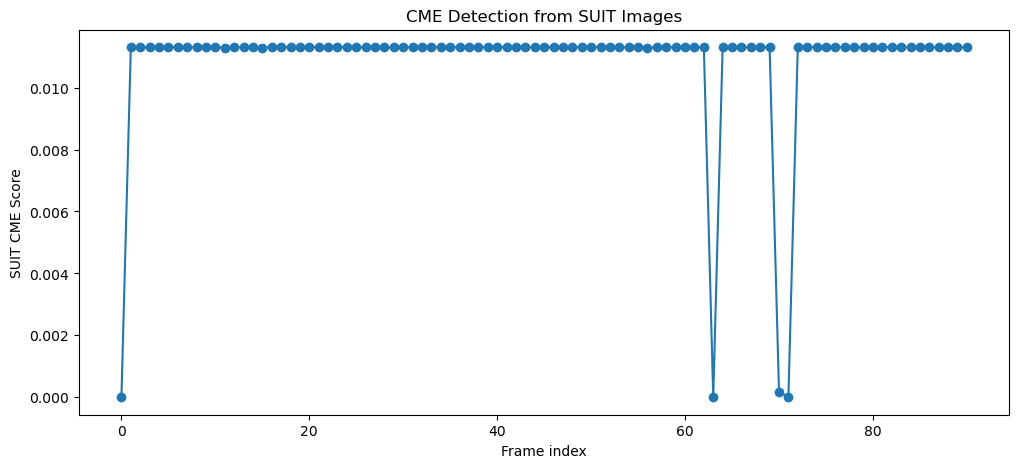

In [39]:
import pandas as pd
import numpy as np
import glob
from astropy.io import fits
import matplotlib.pyplot as plt
from skimage.transform import resize
from scipy.ndimage import median_filter

suit_path = "./suit_data/"
files = sorted(glob.glob(suit_path + "*.fits"))
idx = pd.DataFrame({"file": files})

def load_img(path, downscale=2, target_shape=None):
    with fits.open(path, memmap=False) as hdul:
        x = hdul[0].data.astype(np.float32)
    if target_shape is not None:
        x = resize(x, target_shape, anti_aliasing=True, preserve_range=True).astype(np.float32)
    elif downscale > 1:
        x = resize(x,
                   (x.shape[0]//downscale, x.shape[1]//downscale),
                   anti_aliasing=True, preserve_range=True
                  ).astype(np.float32)
    x = np.nan_to_num(x, 0.0, 0.0, 0.0)
    return x


def limb_annulus_mask(h, w, r_in=0.80, r_out=0.98):
    y, x = np.ogrid[:h, :w]
    cy, cx = h/2.0, w/2.0
    rr = np.sqrt((y-cy)**2 + (x-cx)**2)
    R = min(h, w)/2.0
    return (rr >= R*r_in) & (rr <= R*r_out)

def frame_score(curr, prev, mask):
    d = curr - prev
    d = median_filter(d, size=3)
    p = np.percentile(d[mask], 95)
    thr = max(p, 0.0)
    hot = (d > thr) & mask
    return hot.mean(), d, hot

down = 4
first_img = load_img(idx["file"].iloc[0], downscale=down)
h0, w0 = first_img.shape
mask = limb_annulus_mask(h0, w0, 0.82, 0.98)

scores = []
prev = None
for f in idx["file"]:
    img = load_img(f, target_shape=(h0, w0))  # force same shape
    if prev is None:
        s = 0.0
    else:
        s, diff, hot = frame_score(img, prev, mask)
    scores.append(s)
    prev = img

idx["suit_score"] = scores

plt.figure(figsize=(12,5))
plt.plot(idx.index, idx["suit_score"], marker='o')
plt.xlabel("Frame index")
plt.ylabel("SUIT CME Score")
plt.title("CME Detection from SUIT Images")
plt.show()



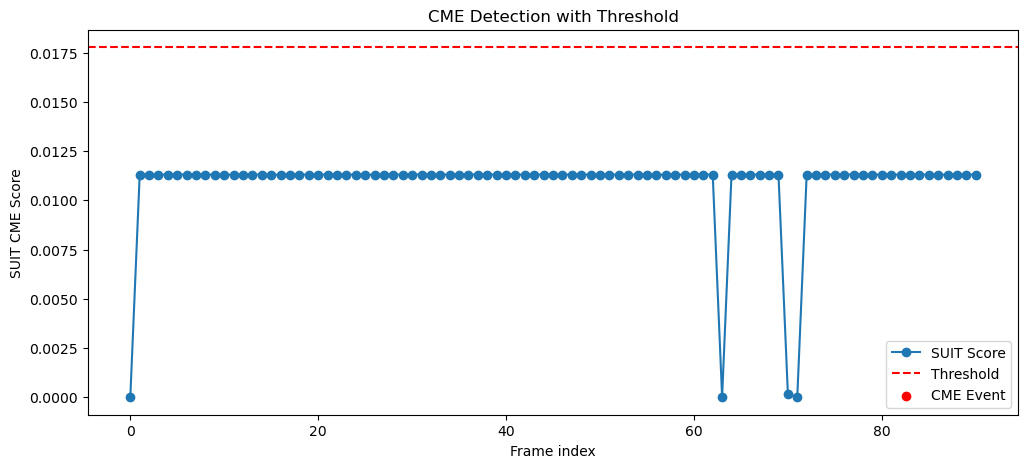

,file,suit_score,cme_flag


In [40]:
threshold = idx["suit_score"].mean() + 3*idx["suit_score"].std()
idx["cme_flag"] = (idx["suit_score"] > threshold).astype(int)

plt.figure(figsize=(12,5))
plt.plot(idx.index, idx["suit_score"], marker='o', label="SUIT Score")
plt.axhline(threshold, color='r', linestyle='--', label="Threshold")
plt.scatter(idx.index[idx["cme_flag"]==1],
            idx["suit_score"][idx["cme_flag"]==1],
            color='red', label="CME Event")
plt.xlabel("Frame index")
plt.ylabel("SUIT CME Score")
plt.title("CME Detection with Threshold")
plt.legend()
plt.show()

idx[idx["cme_flag"]==1]


In [6]:
pip install spacepy

In [42]:
from skimage.transform import resize
import numpy as np
from astropy.io import fits
import os

path = "suit_data"
all_data = []
target_shape = (512, 512)  

for root, dirs, files in os.walk(path):
    for f in files:
        if f.endswith(".fits"):
            file_path = os.path.join(root, f)
            hdul = fits.open(file_path)
            img = hdul[0].data
            hdul.close()
            img_resized = resize(img, target_shape, anti_aliasing=True)
            all_data.append(img_resized)

all_data = np.array(all_data)
print(all_data.shape)


(91, 512, 512)


In [43]:
features = []

for root, dirs, files in os.walk(path):
    for f in files:
        if f.endswith(".fits"):
            file_path = os.path.join(root, f)
            hdul = fits.open(file_path)
            img = hdul[0].data
            hdul.close()
            features.append([img.mean(), img.std(), img.max()])

features = np.array(features)
print(features.shape)


(91, 3)


In [44]:
import numpy as np
all_data = []
path = "suit_data"
for root, dirs, files in os.walk(path):

    hdul = fits.open(os.path.join(path, f))
    data = hdul[0].data
    all_data.append(data)
    hdul.close()

all_data = np.array(all_data)
print(all_data.shape)


(1, 2048, 2048)


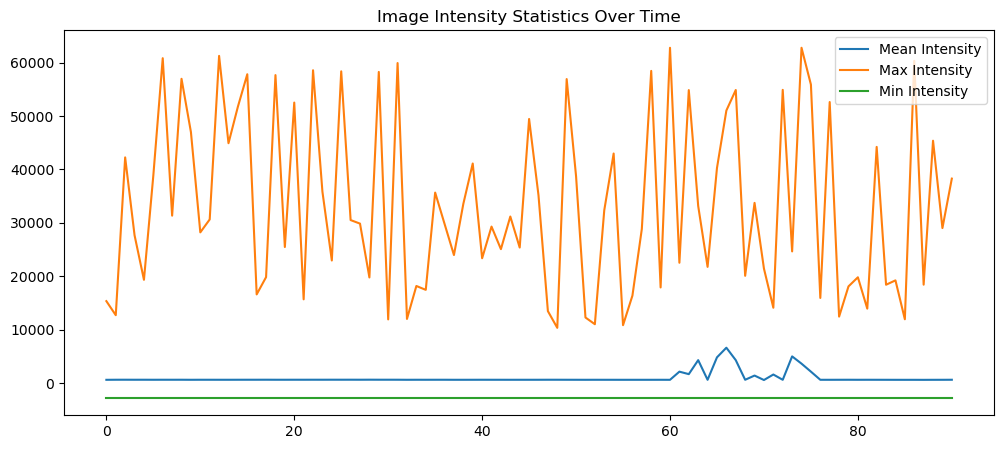

In [45]:
import os
from astropy.io import fits
import matplotlib.pyplot as plt

path = "suit_data"
files = sorted([f for f in os.listdir(path) if f.endswith(".fits")])

mean_intensity = []
max_intensity = []
min_intensity = []

for f in files:
    file_path = os.path.join(path, f)
    hdul = fits.open(file_path)
    img = hdul[0].data
    hdul.close()
    
    mean_intensity.append(img.mean())
    max_intensity.append(img.max())
    min_intensity.append(img.min())

plt.figure(figsize=(12,5))
plt.plot(mean_intensity, label='Mean Intensity')
plt.plot(max_intensity, label='Max Intensity')
plt.plot(min_intensity, label='Min Intensity')
plt.legend()
plt.title("Image Intensity Statistics Over Time")
plt.show()


Detected shift: dy=0.00, dx=0.00
Detected potential CME at pixel coordinates (x=883.15, y=854.02)


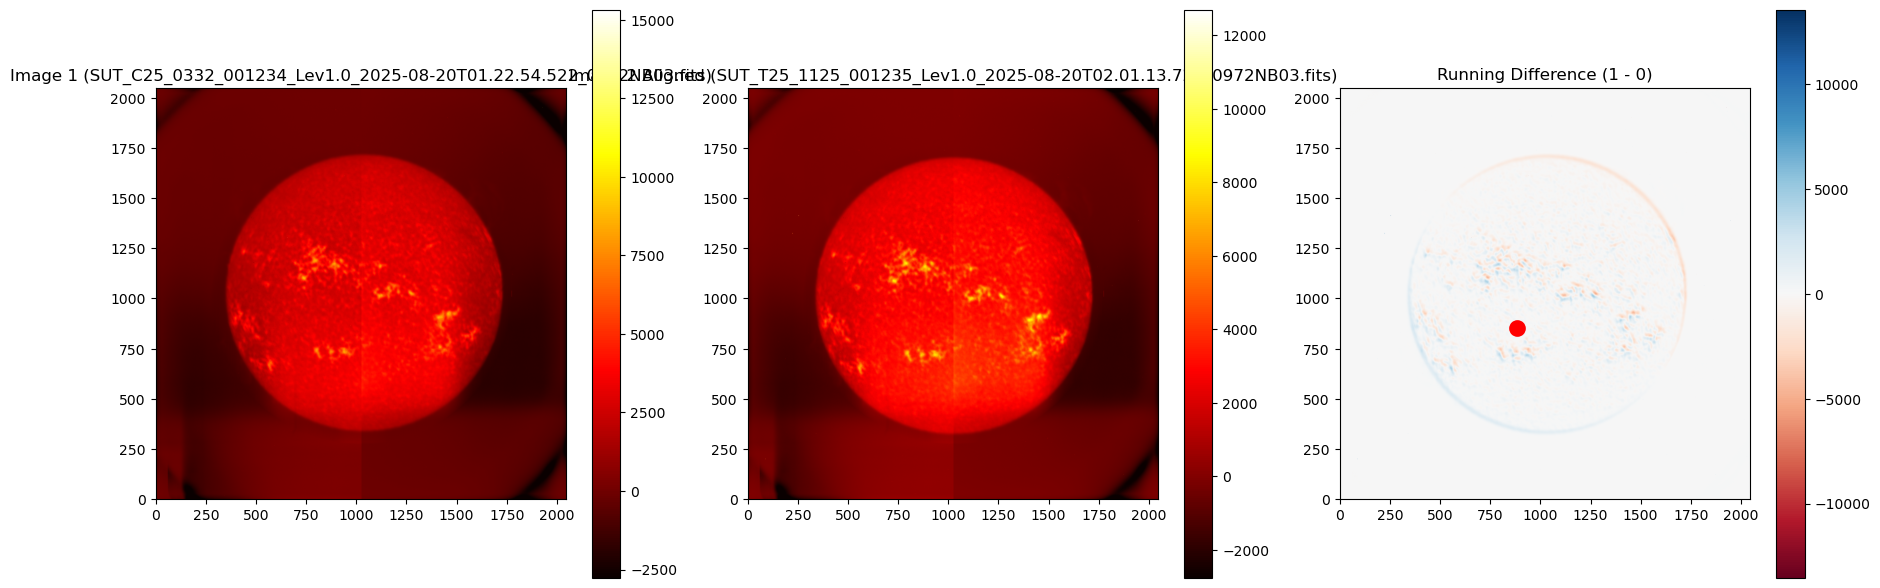

In [50]:
#CME DETECTION

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from astropy.io import fits
from skimage.registration import phase_cross_correlation
from scipy.ndimage import shift
from scipy.ndimage import center_of_mass


def load_data(path="suit_data"):
    """
    Loads FITS file metadata from a specified directory and returns a DataFrame.
    """
    if not os.path.exists(path):
        print(f"Directory '{path}' not found. Please ensure it exists and contains FITS files.")
        return pd.DataFrame()

    files = [os.path.join(path, f) for f in os.listdir(path) if f.endswith(".fits")]
    rows = []
    for f in files:
        try:
            with fits.open(f, memmap=False) as hdul:
                hdr = hdul[0].header
                data = hdul[0].data

                filt = hdr.get("FILTER") or hdr.get("NBAND") or ""
                exp = hdr.get("EXPTIME") or hdr.get("EXPOSURE") or np.nan
                date = hdr.get("DATE-OBS", "")

                if data is not None and hasattr(data, "shape"):
                    ny, nx = data.shape[-2:]
                else:
                    nx, ny = (np.nan, np.nan)

                rows.append((os.path.basename(f), date, filt, exp, nx, ny, f))
        except Exception as e:
            print(f"Skipping {f}: {e}")
    
    df = pd.DataFrame(rows, columns=["File", "Date", "Filter", "Exposure", "Nx", "Ny", "Path"])
    df['Date'] = pd.to_datetime(df['Date'])
    df.sort_values(by='Date', inplace=True)
    return df

def detect_cme(df, date, filter_band, frame_index_1, frame_index_2):
    """
    A complete function to load, align, difference, and detect CMEs in a FITS image sequence.
    
    Args:
        df (pd.DataFrame): The DataFrame containing FITS file metadata.
        date (pd.Timestamp or str): The specific date to filter for.
        filter_band (str): The specific filter band to use.
        frame_index_1 (int): The index of the first image in the sequence.
        frame_index_2 (int): The index of the second image in the sequence.
    """
    # Filter the DataFrame to get a time-series of images for a specific day and filter
    series_df = df[(df['Date'].dt.date == pd.to_datetime(date).date()) & (df['Filter'] == filter_band)].sort_values(by='Date')

    if len(series_df) < 2:
        print("Not enough images in the sequence to perform a running difference.")
        return

    try:
        # Get the file paths for the two consecutive images
        file1 = series_df.iloc[frame_index_1]['Path']
        file2 = series_df.iloc[frame_index_2]['Path']

        # Load the data for both images
        with fits.open(file1, memmap=False) as hdul1:
            data1 = hdul1[0].data
        with fits.open(file2, memmap=False) as hdul2:
            data2 = hdul2[0].data

        # Ensure images have the same dimensions before subtracting
        if data1.shape != data2.shape:
            print("Image dimensions do not match. Skipping differencing.")
            return

        # Perform image alignment using phase_cross_correlation
        shifts, _, _ = phase_cross_correlation(data1, data2)
        shift_y, shift_x = shifts
        print(f"Detected shift: dy={shift_y:.2f}, dx={shift_x:.2f}")

        # Shift the second image to align it with the first image
        data2_aligned = shift(data2, (shift_y, shift_x))

        # Calculate the running difference using the aligned image
        diff_data = data2_aligned - data1

        # Perform CME detection using a simple threshold
        threshold = np.mean(diff_data) + 2 * np.std(diff_data)
        if threshold < 0:
            threshold = 0.0
        
        cme_mask = diff_data > threshold
        
        if np.any(cme_mask):
            centroid_y, centroid_x = center_of_mass(cme_mask)
            print(f"Detected potential CME at pixel coordinates (x={centroid_x:.2f}, y={centroid_y:.2f})")
        else:
            centroid_y, centroid_x = (np.nan, np.nan)
            print("No potential CME detected above the threshold.")

        # Plot the results
        fig, axes = plt.subplots(1, 3, figsize=(18, 6))
        
        im1 = axes[0].imshow(data1, cmap='hot', origin='lower')
        axes[0].set_title(f"Image 1 ({os.path.basename(file1)})")
        fig.colorbar(im1, ax=axes[0])

        im2 = axes[1].imshow(data2_aligned, cmap='hot', origin='lower')
        axes[1].set_title(f"Image 2 Aligned ({os.path.basename(file2)})")
        fig.colorbar(im2, ax=axes[1])

        im_diff = axes[2].imshow(diff_data, cmap='RdBu', origin='lower', vmin=-np.max(np.abs(diff_data)), vmax=np.max(np.abs(diff_data)))
        axes[2].set_title(f"Running Difference ({frame_index_2} - {frame_index_1})")
        fig.colorbar(im_diff, ax=axes[2])

        if not np.isnan(centroid_x):
            axes[2].plot(centroid_x, centroid_y, 'ro', markersize=10, markeredgewidth=2)
            
        plt.tight_layout()
        plt.show()

    except Exception as e:
        print(f"An error occurred: {e}")

# --- Main execution block ---
if __name__ == "__main__":
    df = load_data()
    if not df.empty:
        # Assuming you want to analyze a specific date and filter from your data.
        # This example uses the first available date and filter.
        date_to_analyze = df['Date'].iloc[0]
        filter_to_analyze = df['Filter'].iloc[0]
        
        # This will run the detection on the first two images in the series.
        detect_cme(df, date_to_analyze, filter_to_analyze, 0, 1)



Mean Acceleration: 7.50 km/s^2


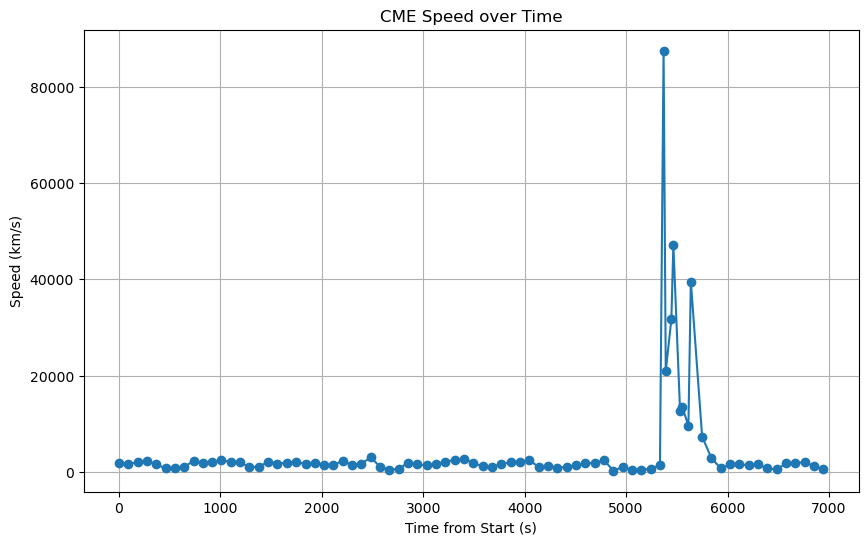

In [56]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from astropy.io import fits
from skimage.registration import phase_cross_correlation
from scipy.ndimage import shift
from scipy.ndimage import center_of_mass

from datetime import datetime

def load_data(path="suit_data"):
    if not os.path.exists(path):
        print(f"Directory '{path}' not found. Please ensure it exists and contains FITS files.")
        return pd.DataFrame()

    files = [os.path.join(path, f) for f in os.listdir(path) if f.endswith(".fits")]
    rows = []
    for f in files:
        try:
            with fits.open(f, memmap=False) as hdul:
                hdr = hdul[0].header
                data = hdul[0].data

                filt = hdr.get("FILTER") or hdr.get("NBAND") or ""
                exp = hdr.get("EXPTIME") or hdr.get("EXPOSURE") or np.nan
                date = hdr.get("DATE-OBS", "")

                if data is not None and hasattr(data, "shape"):
                    ny, nx = data.shape[-2:]
                else:
                    nx, ny = (np.nan, np.nan)

                rows.append((os.path.basename(f), date, filt, exp, nx, ny, f))
        except Exception as e:
            print(f"Skipping {f}: {e}")
    
    df = pd.DataFrame(rows, columns=["File", "Date", "Filter", "Exposure", "Nx", "Ny", "Path"])
    df['Date'] = pd.to_datetime(df['Date'])
    df.sort_values(by='Date', inplace=True)
    return df

def perform_kinematic_analysis(df, date, filter_band, pixel_scale_km_per_pixel=960.0):
    series_df = df[(df['Date'].dt.date == pd.to_datetime(date).date()) & (df['Filter'] == filter_band)].sort_values(by='Date')

    if len(series_df) < 2:
        print("Not enough images in the sequence to perform kinematic analysis.")
        return

    analysis_data = []

    for i in range(len(series_df) - 1):
        file1_path = series_df.iloc[i]['Path']
        file2_path = series_df.iloc[i + 1]['Path']
        
        with fits.open(file1_path, memmap=False) as hdul1:
            data1 = hdul1[0].data
        with fits.open(file2_path, memmap=False) as hdul2:
            data2 = hdul2[0].data

        time1 = series_df.iloc[i]['Date']
        time2 = series_df.iloc[i + 1]['Date']
        time_diff_s = (time2 - time1).total_seconds()

        if data1.shape != data2.shape:
            continue

        shifts, _, _ = phase_cross_correlation(data1, data2)
        shift_y, shift_x = shifts
        data2_aligned = shift(data2, (shift_y, shift_x))

        diff_data = data2_aligned - data1

        threshold = np.mean(diff_data) + 2 * np.std(diff_data)
        if threshold < 0:
            threshold = 0.0
        
        cme_mask = diff_data > threshold
        
        if np.any(cme_mask):
            centroid_y, centroid_x = center_of_mass(cme_mask)
        else:
            continue

        if i > 0:
            last_centroid_y = analysis_data[-1]['CentroidY']
            last_centroid_x = analysis_data[-1]['CentroidX']
            
            pixel_distance = np.sqrt((centroid_x - last_centroid_x)**2 + (centroid_y - last_centroid_y)**2)
            physical_distance_km = pixel_distance * pixel_scale_km_per_pixel
            instantaneous_speed_km_s = physical_distance_km / time_diff_s
            
            analysis_data.append({
                'Timestamp': time2,
                'CentroidX': centroid_x,
                'CentroidY': centroid_y,
                'InstantaneousSpeed_km_s': instantaneous_speed_km_s
            })
        else:
            analysis_data.append({
                'Timestamp': time2,
                'CentroidX': centroid_x,
                'CentroidY': centroid_y,
                'InstantaneousSpeed_km_s': np.nan
            })

    analysis_df = pd.DataFrame(analysis_data)
    analysis_df.dropna(inplace=True)

    if not analysis_df.empty:
        analysis_df['Time_from_start_s'] = (analysis_df['Timestamp'] - analysis_df['Timestamp'].iloc[0]).dt.total_seconds()
        
        speeds = analysis_df['InstantaneousSpeed_km_s'].values
        times = analysis_df['Time_from_start_s'].values

        if len(speeds) > 1:
            acceleration = np.diff(speeds) / np.diff(times)
            mean_acceleration = np.mean(acceleration)
            print(f"Mean Acceleration: {mean_acceleration:.2f} km/s^2")
        else:
            print("Not enough data to calculate acceleration.")
            
        fig, ax = plt.subplots(figsize=(10, 6))
        ax.plot(analysis_df['Time_from_start_s'], speeds, marker='o', linestyle='-')
        ax.set_title("CME Speed over Time")
        ax.set_xlabel("Time from Start (s)")
        ax.set_ylabel("Speed (km/s)")
        ax.grid(True)
        plt.show()

if __name__ == "__main__":
    df = load_data()
    if not df.empty:
        date_to_analyze = df['Date'].iloc[0]
        filter_to_analyze = df['Filter'].iloc[0]
        
        perform_kinematic_analysis(df, date_to_analyze, filter_to_analyze)



--- Analysis Results ---
                    Timestamp   Speed_km_s  AngularWidth_deg  \
0  2025-08-20 02:01:13.726390          NaN        359.916721   
1  2025-08-20 02:02:45.694550  1874.187121        359.917322   
2  2025-08-20 02:04:17.662845  1513.490541        359.913970   
3  2025-08-20 02:05:49.631130  2018.551279        359.911988   
4  2025-08-20 02:07:21.599300  2221.541202        359.913841   
..                        ...          ...               ...   
77 2025-08-20 03:52:23.466885  1736.511131        359.888530   
78 2025-08-20 03:53:55.435170  1733.138923        359.912526   
79 2025-08-20 03:55:27.403330  2086.968085        359.916234   
80 2025-08-20 03:56:59.371625  1095.218291        359.916600   
81 2025-08-20 03:58:31.339785   503.653178        359.917083   

            Classification  
0               Low Impact  
1   High Impact (Halo CME)  
2   High Impact (Halo CME)  
3   High Impact (Halo CME)  
4   High Impact (Halo CME)  
..                     ...  
77

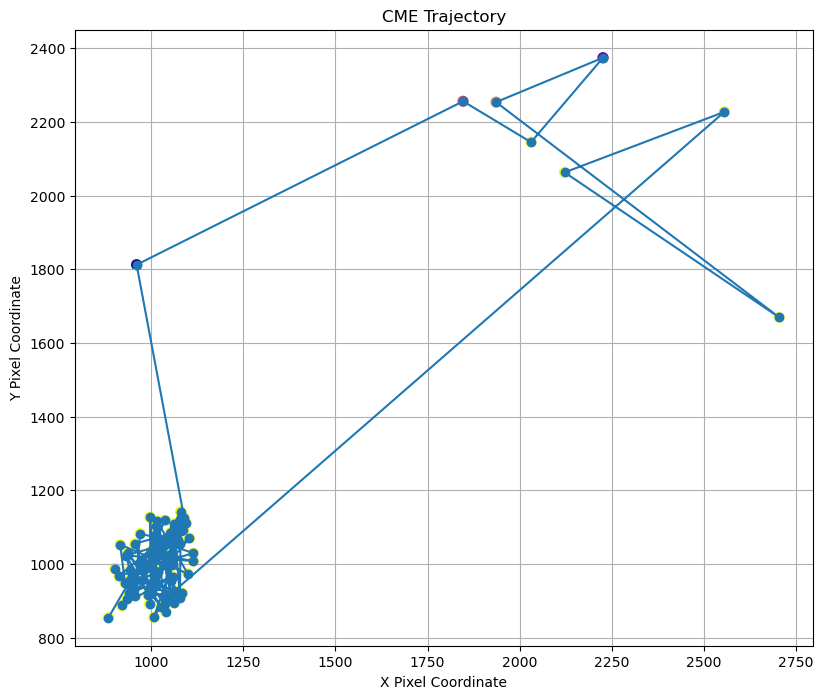

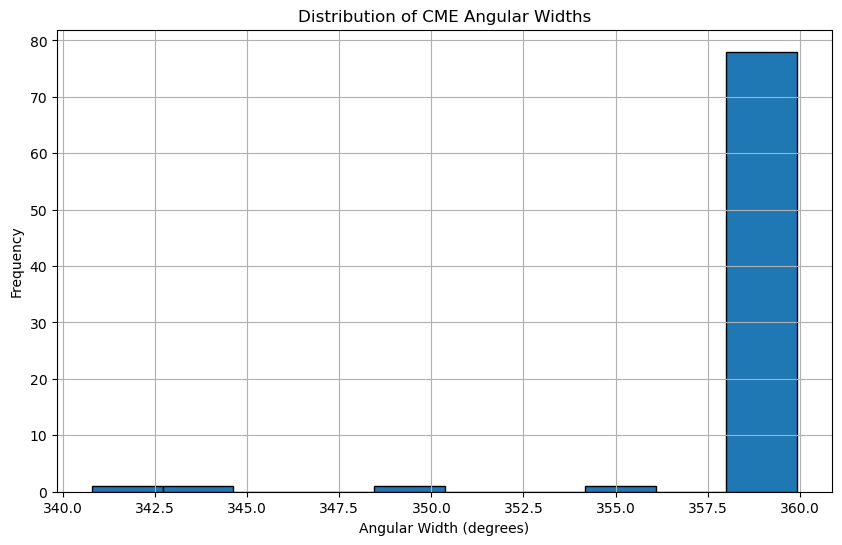

Generating animation frames in 'cme_animation_frames'...
Animation frames generated. Use a tool like FFmpeg or a simple Python script to combine them.


In [58]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from astropy.io import fits
from skimage.registration import phase_cross_correlation
from scipy.ndimage import shift
from scipy.ndimage import center_of_mass
from datetime import datetime

def load_data(path="suit_data"):
    if not os.path.exists(path):
        print(f"Directory '{path}' not found. Please ensure it exists and contains FITS files.")
        return pd.DataFrame()

    files = [os.path.join(path, f) for f in os.listdir(path) if f.endswith(".fits")]
    rows = []
    for f in files:
        try:
            with fits.open(f, memmap=False) as hdul:
                hdr = hdul[0].header
                data = hdul[0].data

                filt = hdr.get("FILTER") or hdr.get("NBAND") or ""
                exp = hdr.get("EXPTIME") or hdr.get("EXPOSURE") or np.nan
                date = hdr.get("DATE-OBS", "")

                if data is not None and hasattr(data, "shape"):
                    ny, nx = data.shape[-2:]
                else:
                    nx, ny = (np.nan, np.nan)

                rows.append((os.path.basename(f), date, filt, exp, nx, ny, f))
        except Exception as e:
            print(f"Skipping {f}: {e}")
    
    df = pd.DataFrame(rows, columns=["File", "Date", "Filter", "Exposure", "Nx", "Ny", "Path"])
    df['Date'] = pd.to_datetime(df['Date'])
    df.sort_values(by='Date', inplace=True)
    return df

def classify_cme(speed_km_s, width_deg):
    if speed_km_s > 1500 and width_deg > 180:
        return "High Impact (Halo CME)"
    elif speed_km_s > 1000 and width_deg > 90:
        return "Medium Impact"
    else:
        return "Low Impact"

def perform_morphological_analysis(df, date, filter_band, pixel_scale_km_per_pixel=960.0):
    series_df = df[(df['Date'].dt.date == pd.to_datetime(date).date()) & (df['Filter'] == filter_band)].sort_values(by='Date')

    if len(series_df) < 2:
        print("Not enough images in the sequence to perform morphological analysis.")
        return

    analysis_data = []

    for i in range(len(series_df) - 1):
        file1_path = series_df.iloc[i]['Path']
        file2_path = series_df.iloc[i + 1]['Path']
        
        with fits.open(file1_path, memmap=False) as hdul1:
            data1 = hdul1[0].data
        with fits.open(file2_path, memmap=False) as hdul2:
            data2 = hdul2[0].data

        time1 = series_df.iloc[i]['Date']
        time2 = series_df.iloc[i + 1]['Date']
        time_diff_s = (time2 - time1).total_seconds()

        if data1.shape != data2.shape:
            continue

        shifts, _, _ = phase_cross_correlation(data1, data2)
        shift_y, shift_x = shifts
        data2_aligned = shift(data2, (shift_y, shift_x))
        diff_data = data2_aligned - data1

        threshold = np.mean(diff_data) + 2 * np.std(diff_data)
        if threshold < 0:
            threshold = 0.0
        
        cme_mask = diff_data > threshold
        
        if np.any(cme_mask):
            centroid_y, centroid_x = center_of_mass(cme_mask)
            
            y_coords, x_coords = np.where(cme_mask)
            
            center_y, center_x = np.array(data1.shape) / 2.0
            
            angles = np.arctan2(y_coords - center_y, x_coords - center_x)
            
            angular_width_rad = np.max(angles) - np.min(angles)
            angular_width_deg = np.degrees(angular_width_rad)
            
            speed_km_s = np.nan
            if i > 0:
                last_centroid_y = analysis_data[-1]['CentroidY']
                last_centroid_x = analysis_data[-1]['CentroidX']
                pixel_distance = np.sqrt((centroid_x - last_centroid_x)**2 + (centroid_y - last_centroid_y)**2)
                physical_distance_km = pixel_distance * pixel_scale_km_per_pixel
                speed_km_s = physical_distance_km / time_diff_s
            
            classification = classify_cme(speed_km_s if not np.isnan(speed_km_s) else 0, angular_width_deg)
            
            analysis_data.append({
                'Timestamp': time2,
                'CentroidX': centroid_x,
                'CentroidY': centroid_y,
                'Speed_km_s': speed_km_s,
                'AngularWidth_deg': angular_width_deg,
                'Classification': classification,
                'Image_Data': diff_data,
                'CME_Mask': cme_mask
            })

    analysis_df = pd.DataFrame(analysis_data)
    
    if analysis_df.empty:
        print("No CMEs detected in the sequence.")
        return

    return analysis_df

def create_visualizations(analysis_df):
    
    fig, ax = plt.subplots(figsize=(10, 8))
    ax.plot(analysis_df['CentroidX'], analysis_df['CentroidY'], marker='o', linestyle='-')
    ax.scatter(analysis_df['CentroidX'], analysis_df['CentroidY'], s=50, c=analysis_df['AngularWidth_deg'], cmap='plasma')
    ax.set_title("CME Trajectory")
    ax.set_xlabel("X Pixel Coordinate")
    ax.set_ylabel("Y Pixel Coordinate")
    ax.grid(True)
    ax.set_aspect('equal')
    plt.show()

    plt.figure(figsize=(10, 6))
    plt.hist(analysis_df['AngularWidth_deg'].dropna(), bins=10, edgecolor='black')
    plt.title("Distribution of CME Angular Widths")
    plt.xlabel("Angular Width (degrees)")
    plt.ylabel("Frequency")
    plt.grid(True)
    plt.show()

    output_dir = "cme_animation_frames"
    os.makedirs(output_dir, exist_ok=True)
    
    print(f"Generating animation frames in '{output_dir}'...")
    for i, row in analysis_df.iterrows():
        fig, ax = plt.subplots(figsize=(8, 8))
        im_diff = ax.imshow(row['Image_Data'], cmap='RdBu', origin='lower', vmin=-np.max(np.abs(row['Image_Data'])), vmax=np.max(np.abs(row['Image_Data'])))
        ax.set_title(f"Running Difference - {row['Timestamp']}")
        fig.colorbar(im_diff, ax=ax)
        
        if not np.isnan(row['CentroidX']):
            ax.plot(row['CentroidX'], row['CentroidY'], 'ro', markersize=10, markeredgewidth=2)
            
        plt.savefig(os.path.join(output_dir, f"frame_{i:04d}.png"))
        plt.close(fig)
    print("Animation frames generated. Use a tool like FFmpeg or a simple Python script to combine them.")
    
if __name__ == "__main__":
    df = load_data()
    if not df.empty:
        date_to_analyze = df['Date'].iloc[0]
        filter_to_analyze = df['Filter'].iloc[0]
        
        analysis_df = perform_morphological_analysis(df, date_to_analyze, filter_to_analyze)
        
        if analysis_df is not None and not analysis_df.empty:
            print("\n--- Analysis Results ---")
            print(analysis_df[['Timestamp', 'Speed_km_s', 'AngularWidth_deg', 'Classification']])
            
            print("\n--- Generating Visualizations ---")
            create_visualizations(analysis_df)
